**KEVAL PARMAR**

**MFG 598**: Engineering Computing With Python

**PYTHON PROJECT: Diabetes Detection with AdaBoost Algorithm and Hypertuned Random forest model as estimator**



*REFERENCES*  :
*[KAGGLE DATASET](https://www.kaggle.com/code/mohitanand123/diabetes-prediction-with-ml)*

Codes for Hypertuning I have Utilised and referred sklearn's Decision tree and Random forest algorithms official Documentation.

*[Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)*

*[Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)*

*[AdaBoost Algorithm](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)*




In [ ]:
#Importing Necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
# Reading the CSV file

filecsv = pd.read_csv('/content/diabetes_prediction_dataset.csv')
filecsv

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [ ]:
filecsv.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


Now From the following snippets of code Data procssing and filtering will commence, where I got the idea of the data basically How the data is divided, and got the idea about how all the attributes are posiively and negatively skewed. Plotted some histograms, bar graph and some outlier box plots which was important so that the model can achieve upto 99% or above training accuracy

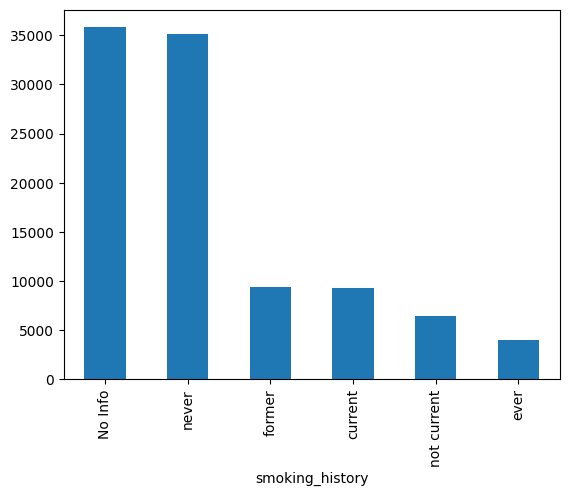

In [ ]:
filecsv.smoking_history.value_counts().plot(kind='bar')
plt.show()

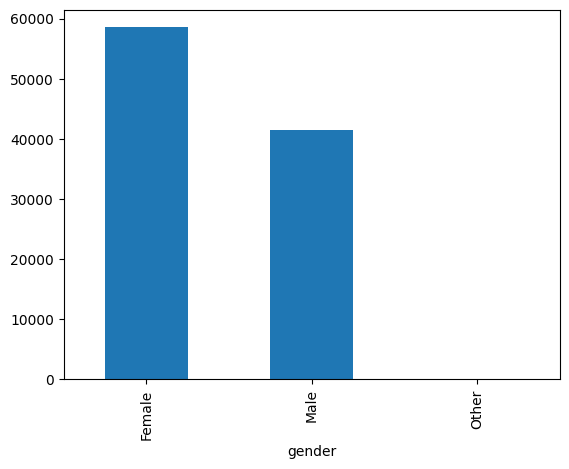

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [ ]:
filecsv.gender.value_counts().plot(kind='bar')
plt.show()
filecsv.gender.value_counts()

In [ ]:
# Calculates the mean of numeric columns grouped by gender.
filecsv.groupby('gender').mean(numeric_only=True)



,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,,,,,,,
Female,42.463291,0.071680,0.026677,27.449287,5.509477,137.468951,0.076189
Male,41.075139,0.079363,0.057446,27.139108,5.553041,138.890031,0.097490
Other,29.555556,0.000000,0.000000,27.379444,5.405556,139.444444,0.000000


In [ ]:
#Groups the DataFrame by 'gender' and 'smoking_history', then reshapes the result into a pivot table, filling missing values with 0.Groups the DataFrame by 'gender' and 'smoking_history', then reshapes the result into a pivot table, filling missing values with 0.
filecsv.groupby(['gender', 'smoking_history']).size().unstack(fill_value=0)

smoking_history,No Info,current,ever,former,never,not current
gender,,,,,,
Female,19700,5058,2238,4774,22869,3913
Male,16110,4228,1765,4578,12223,2526
Other,6,0,1,0,3,8


In [ ]:

filecsv.loc[filecsv.gender=='Other', 'gender']='Female'

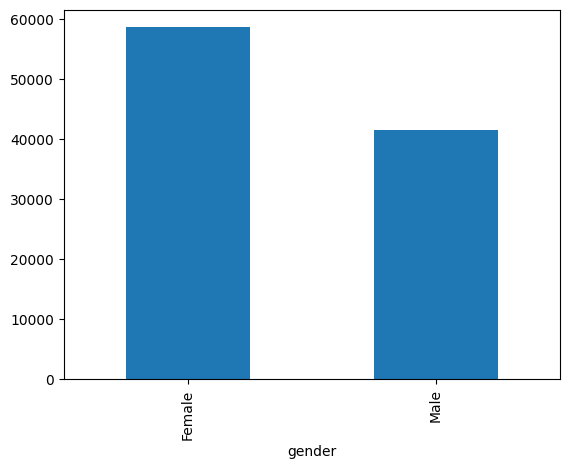

In [ ]:
filecsv.gender.value_counts().plot(kind='bar')
plt.show()

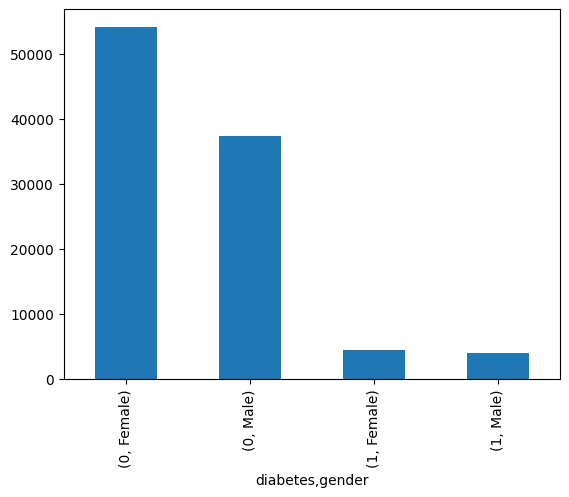

In [ ]:

#Generates a bar plot showing the count of genders for each diabetes category.
filecsv.groupby('diabetes')['gender'].value_counts().plot(kind='bar')
plt.show()

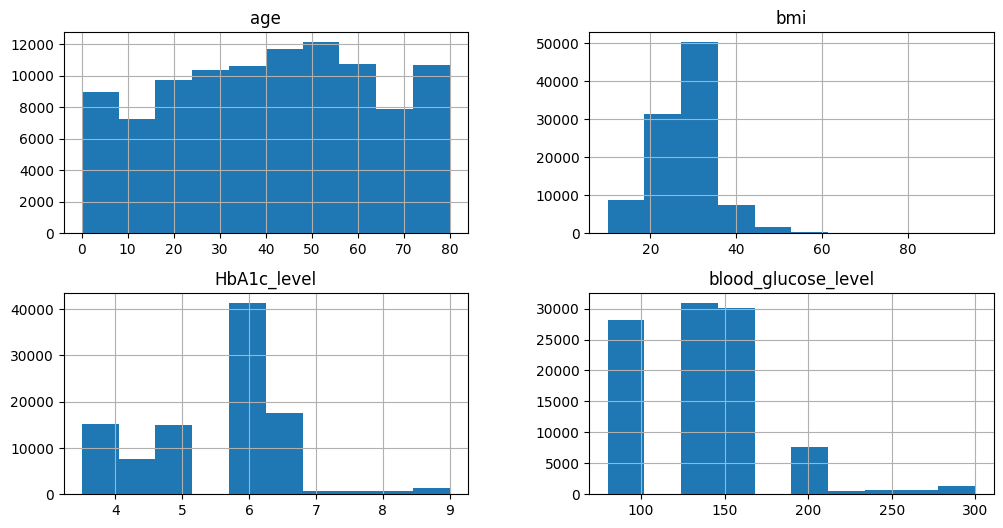

In [ ]:
filecsv[['age','bmi','HbA1c_level','blood_glucose_level']].hist(figsize=(12,6))
plt.show()

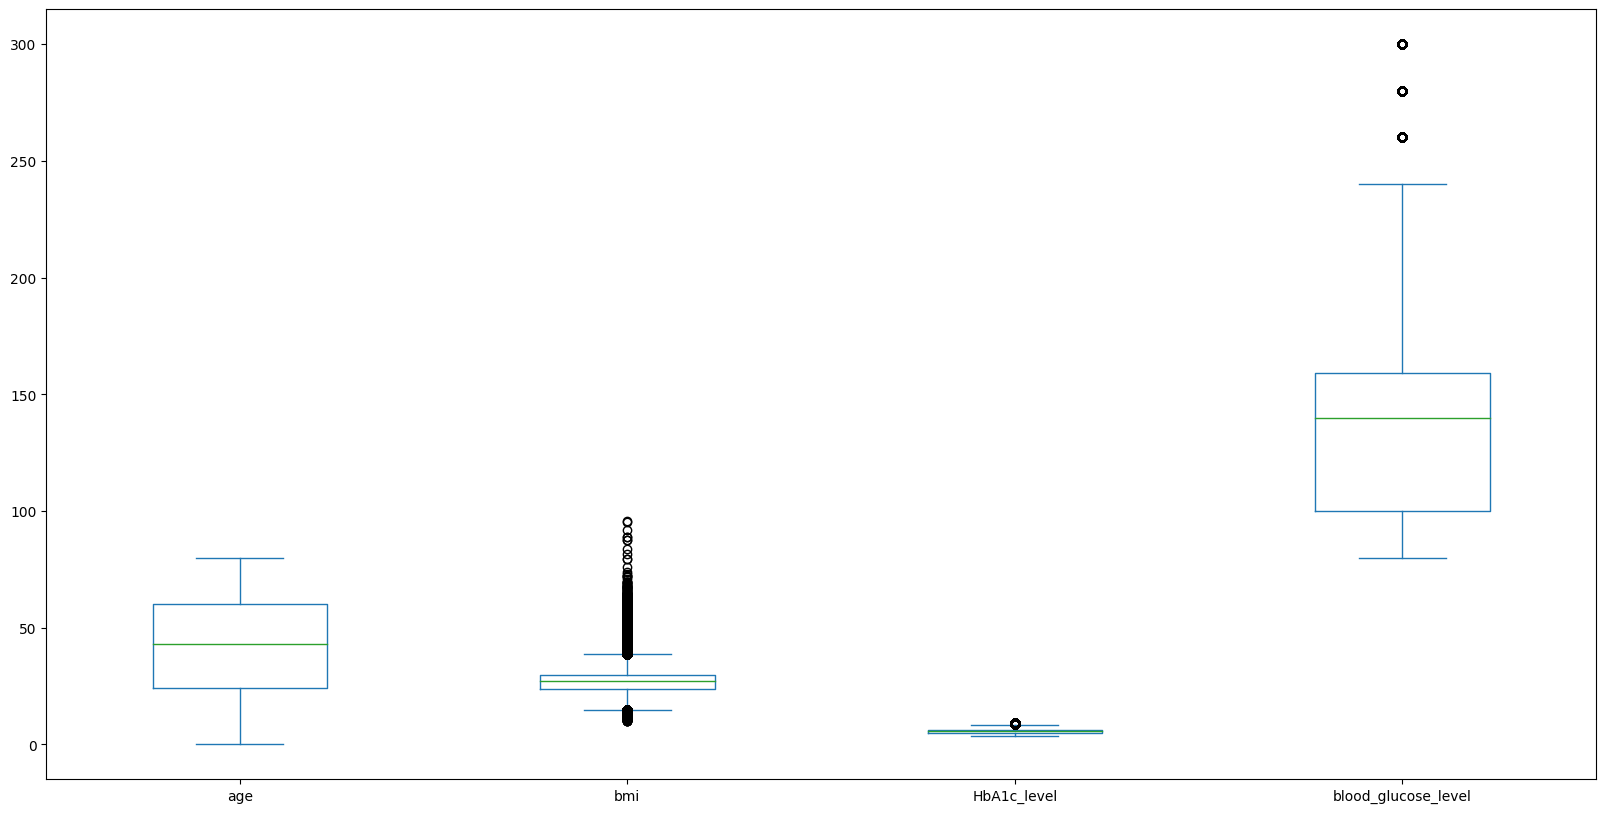

In [ ]:
filecsv[['age','bmi','HbA1c_level','blood_glucose_level']].plot(kind='box', figsize=(20,10))
plt.show()

In [ ]:
#Calculates the normalized value counts of the 'diabetes' column, representing the proportion of each category in the dataset.
filecsv.diabetes.value_counts(normalize=True)

diabetes
0    0.915
1    0.085
Name: proportion, dtype: float64

In [ ]:
#Calculates the normalized value counts of the 'hypertension' column, representing the proportion of each category in the dataset.
filecsv.hypertension.value_counts(normalize=True)

hypertension
0    0.92515
1    0.07485
Name: proportion, dtype: float64

In [ ]:
#Calculates the normalized value counts of the 'heart_disease' column, representing the proportion of each category in the dataset.
filecsv.heart_disease.value_counts(normalize=True)

heart_disease
0    0.96058
1    0.03942
Name: proportion, dtype: float64

In [ ]:
#Creates a cross-tabulation between 'diabetes' and 'hypertension' columns, normalizing the result by columns.
pd.crosstab(index=filecsv.diabetes, columns=filecsv.hypertension, normalize='columns')

hypertension,0,1
diabetes,,
0,0.930692,0.721042
1,0.069308,0.278958


In [ ]:
#Applies a lambda function to convert the 'gender' column to numerical values, where 1 represents 'Female' and 0 represents other genders.

filecsv.gender=filecsv.gender.apply(lambda x: 1 if x == 'Female' else 0)

In [ ]:
# Encodes the categorical feature 'smoking_history' using one-hot encoding and creates a new DataFrame 'encoder_csv' with the encoded features
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder_new=encoder.fit_transform(filecsv[['smoking_history']]).toarray()
labels=encoder.categories_
feat_labels=np.concatenate(labels)
encoder_csv=pd.DataFrame(data=encoder_new, columns=feat_labels)
encoder_csv

,No Info,current,ever,former,never,not current
0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
99995,1.0,0.0,0.0,0.0,0.0,0.0
99996,1.0,0.0,0.0,0.0,0.0,0.0
99997,0.0,0.0,0.0,1.0,0.0,0.0
99998,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
#Concatenates the DataFrame 'filecsv' with the encoded features from 'encoder_csv', then drops the original 'smoking_history' column to replace it with the encoded version.
filecsv=pd.concat([filecsv, encoder_csv], axis=1)
filecsv=filecsv.drop('smoking_history', axis=1)
filecsv

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,No Info,current,ever,former,never,not current
0,1,80.0,0,1,25.19,6.6,140,0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,54.0,0,0,27.32,6.6,80,0,1.0,0.0,0.0,0.0,0.0,0.0
2,0,28.0,0,0,27.32,5.7,158,0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,36.0,0,0,23.45,5.0,155,0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,76.0,1,1,20.14,4.8,155,0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,80.0,0,0,27.32,6.2,90,0,1.0,0.0,0.0,0.0,0.0,0.0
99996,1,2.0,0,0,17.37,6.5,100,0,1.0,0.0,0.0,0.0,0.0,0.0
99997,0,66.0,0,0,27.83,5.7,155,0,0.0,0.0,0.0,1.0,0.0,0.0
99998,1,24.0,0,0,35.42,4.0,100,0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
#Applies Min-Max scaling to the features in the DataFrame 'filecsv' using sklearn's MinMaxScaler, then creates a new DataFrame 'csv_scaled' containing the scaled features.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_norm=scaler.fit_transform(filecsv)
csv_scaled=pd.DataFrame(data=scaled_norm, columns=filecsv.columns)
csv_scaled

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,No Info,current,ever,former,never,not current
0,1.0,1.000000,0.0,1.0,0.177171,0.563636,0.272727,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.674675,0.0,0.0,0.202031,0.563636,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.349349,0.0,0.0,0.202031,0.400000,0.354545,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.449449,0.0,0.0,0.156863,0.272727,0.340909,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.949950,1.0,1.0,0.118231,0.236364,0.340909,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.0,1.000000,0.0,0.0,0.202031,0.490909,0.045455,0.0,1.0,0.0,0.0,0.0,0.0,0.0
99996,1.0,0.024024,0.0,0.0,0.085901,0.545455,0.090909,0.0,1.0,0.0,0.0,0.0,0.0,0.0
99997,0.0,0.824825,0.0,0.0,0.207983,0.400000,0.340909,0.0,0.0,0.0,0.0,1.0,0.0,0.0
99998,1.0,0.299299,0.0,0.0,0.296569,0.090909,0.090909,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
#Splits the dataset into training and testing sets. 'X_train' and 'X_test' contain the features, while 'y_train' and 'y_test' contain the target variable 'diabetes'.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(filecsv.drop('diabetes', axis=1), filecsv.diabetes, test_size=0.2, random_state=13)

In [ ]:
# Assigns the features (excluding the 'diabetes' column) to 'X1' and the target variable 'diabetes' to 'y' from the scaled dataset 'csv_scaled'.
X1, y = csv_scaled.drop('diabetes', axis=1), csv_scaled.diabetes

In [ ]:
# Evaluate the decision tree using 5-fold cross-validation w.r.t min_samples_leaf
#===========================================
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from tabulate import tabulate
results = []
def dtc_parameter_tune(train_val_X, train_val_y):
    leafs = [1,2,3,4, 5, 10, 20, 50, 100,  150, 200]
    trains = []

    vals = []
    kf = KFold(n_splits = 5)
    for l in leafs:
        train_acc = []
        val_acc = []
        for train_index, val_index in kf.split(train_val_X):
            train_X = train_val_X.iloc[train_index,:]
            val_X = train_val_X.iloc[val_index,:]

            train_y = train_val_y[train_index]
            val_y = train_val_y[val_index]

            dtc = DecisionTreeClassifier(criterion='gini', min_samples_leaf=l)
            dtc.fit(train_X, train_y)
            train_acc.append(dtc.score(train_X, train_y))
            val_acc.append(dtc.score(val_X, val_y))


        avg_train_acc = sum(train_acc) / len(train_acc)
        avg_val_acc = sum(val_acc) / len(val_acc)

        trains.append(avg_train_acc)
        vals.append(avg_val_acc)
        results.append([l, avg_train_acc, avg_val_acc])
    return leafs, trains, vals

leafs, trains, vals = dtc_parameter_tune(X1, y)
headers = ["min_sample_leaf", "Training Accuracy", "Test Accuracy"]
print(tabulate(results, headers=headers, tablefmt="pretty"))


+-----------------+--------------------+--------------------+
| min_sample_leaf | Training Accuracy  |   Test Accuracy    |
+-----------------+--------------------+--------------------+
|        1        | 0.9992224999999999 | 0.9517999999999999 |
|        2        |      0.987255      |      0.95996       |
|        3        |      0.983405      | 0.9593499999999999 |
|        4        | 0.9800449999999999 | 0.9635300000000001 |
|        5        | 0.9786199999999999 | 0.9632099999999999 |
|       10        |      0.974625      |      0.96836       |
|       20        | 0.9730549999999999 |      0.97081       |
|       50        | 0.9722424999999999 | 0.9720000000000001 |
|       100       | 0.9720000000000001 |      0.97195       |
|       150       |      0.971895      | 0.9718500000000001 |
|       200       |      0.97187       |      0.97187       |
+-----------------+--------------------+--------------------+


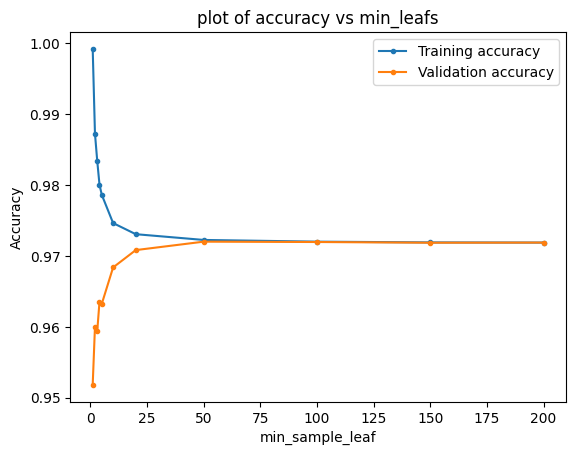

In [ ]:
#plot of accuracy vs min_leafs
#================================
plt.plot(leafs, trains, marker='.', label="Training accuracy")
plt.plot(leafs, vals, marker='.', label="Validation accuracy")
plt.xlabel('min_sample_leaf')
plt.ylabel('Accuracy')
plt.title('plot of accuracy vs min_leafs')
plt.legend()

In [ ]:
#Performs hyperparameter tuning for a decision tree classifier using cross-validated evaluation with different values of 'max_features'.
#The function calculates training and validation accuracies for each value and displays the results in a table.
from sklearn.model_selection import KFold
from sklearn import tree
results = []
def dtc_parameter_tune(train_val_X, train_val_y):
    features = ['sqrt', 'log2',1,20, 25, 50, 75, 100, 125, 150, 200, 300, 500]
    trains = []
    vals = []

    kf = KFold(n_splits = 5)
    for i in features:
        train_acc = []
        val_acc = []

        for train_index, val_index in kf.split(train_val_X):
            train_X=train_val_X.iloc[train_index,:]
            val_X = train_val_X.iloc[val_index,:]

            train_y = train_val_y[train_index]
            val_y = train_val_y[val_index]

            dtc = DecisionTreeClassifier(criterion='gini', max_features=i)
            dtc.fit(train_X, train_y)
            train_acc.append(dtc.score(train_X, train_y))
            val_acc.append(dtc.score(val_X, val_y))

        avg_train_acc = sum(train_acc) / len(train_acc)
        avg_val_acc = sum(val_acc) / len(val_acc)
        results.append([i, avg_train_acc, avg_val_acc])

        trains.append(avg_train_acc)
        vals.append(avg_val_acc)

    return features, trains, vals

features, trains, vals = dtc_parameter_tune(X1, y)
headers = ["max_features", "Training Accuracy", "Test Accuracy"]
print(tabulate(results, headers=headers, tablefmt="pretty"))

+--------------+--------------------+--------------------+
| max_features | Training Accuracy  |   Test Accuracy    |
+--------------+--------------------+--------------------+
|     sqrt     | 0.9992224999999999 |      0.95351       |
|     log2     | 0.9992224999999999 |      0.95414       |
|      1       | 0.9992224999999999 | 0.9492100000000001 |
|      20      | 0.9992224999999999 |      0.95214       |
|      25      | 0.9992224999999999 |      0.95235       |
|      50      | 0.9992224999999999 | 0.9517599999999999 |
|      75      | 0.9992224999999999 | 0.9518099999999998 |
|     100      | 0.9992224999999999 | 0.9517899999999999 |
|     125      | 0.9992224999999999 | 0.9515499999999999 |
|     150      | 0.9992224999999999 | 0.9514999999999999 |
|     200      | 0.9992224999999999 | 0.9517599999999999 |
|     300      | 0.9992224999999999 |      0.95168       |
|     500      | 0.9992224999999999 | 0.9515499999999999 |
+--------------+--------------------+-------------------

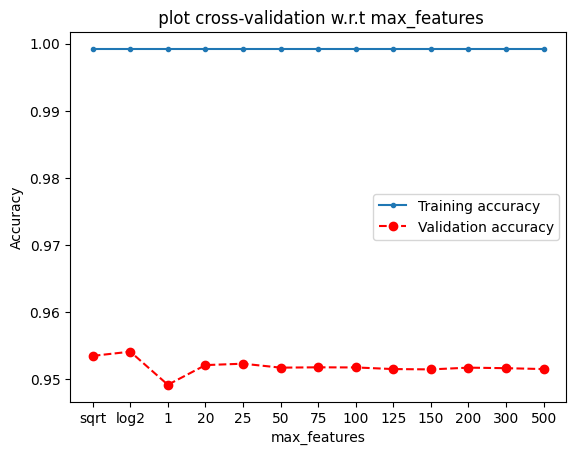

In [ ]:
#Plots the training and validation accuracies against different values of 'max_features' obtained from cross-validated evaluation.
#Illustrating the impact of this hyperparameter on the decision tree classifier's performance.
plt.plot(features, trains, marker='.', label="Training accuracy")
plt.plot(features, vals, 'ro--', label="Validation accuracy")
plt.xlabel('max_features')
plt.ylabel('Accuracy')
plt.title(' plot cross-validation w.r.t max_features')
plt.legend()

In [ ]:
# 5-fold cross-validation to evaluate the performance w.r.t. the number of trees (n_estimators)
#=============================================
from sklearn import ensemble
results = []
def dtc_parameter_tune(train_val_X, train_val_y):
    train_acc_all = []
    val_acc_all = []
    n_trees = [1,10,25,50,100,200,300, 400, 500]

    kf = KFold(n_splits = 5)
    for n in n_trees:
        train_acc = []
        val_acc = []
        # print("========= depth:", depth)
        for train_index, val_index in kf.split(train_val_X):
            ##########################
            train_X=train_val_X.iloc[train_index,:]
            val_X = train_val_X.iloc[val_index,:]

            train_y = train_val_y[train_index]
            val_y = train_val_y[val_index]

            dtc = ensemble.RandomForestClassifier(max_features= 'log2', min_samples_leaf= 1, n_estimators= n)
            # dtc = ensemble.RandomForestClassifier(n_estimators= n)
            dtc.fit(train_X, train_y)
            train_acc.append(dtc.score(train_X, train_y))
            val_acc.append(dtc.score(val_X, val_y))


        avg_train_acc = sum(train_acc) / len(train_acc)
        avg_val_acc = sum(val_acc) / len(val_acc)
        results.append([n, avg_train_acc, avg_val_acc])

        train_acc_all.append(avg_train_acc)
        val_acc_all.append(avg_val_acc)

    return n_trees, train_acc_all, val_acc_all


n_trees, train_acc_all, val_acc_all = dtc_parameter_tune(X1, y)
headers = ["n_estimators", "Training Accuracy", "Test Accuracy"]
print(tabulate(results, headers=headers, tablefmt="pretty"))

+--------------+--------------------+--------------------+
| n_estimators | Training Accuracy  |   Test Accuracy    |
+--------------+--------------------+--------------------+
|      1       |      0.981725      |      0.95052       |
|      10      | 0.9946674999999999 |      0.96905       |
|      25      |     0.9983975      | 0.9692700000000001 |
|      50      | 0.9989600000000001 |      0.96973       |
|     100      | 0.9992000000000001 |      0.96966       |
|     200      |      0.99922       |      0.96994       |
|     300      | 0.9992224999999999 | 0.9699500000000001 |
|     400      | 0.9992224999999999 | 0.9699200000000001 |
|     500      | 0.9992224999999999 | 0.9699499999999999 |
+--------------+--------------------+--------------------+


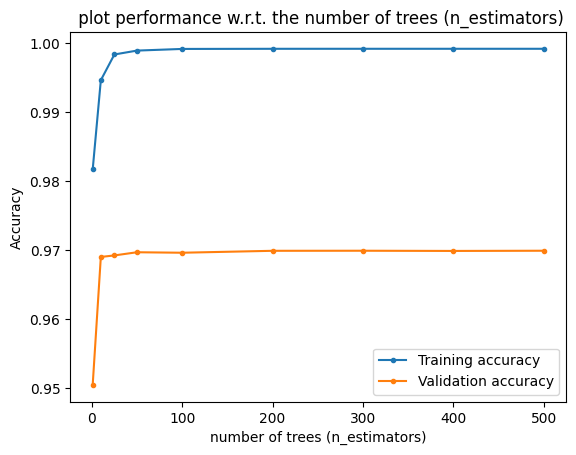

In [ ]:
# Plots the training and validation accuracies against different numbers of trees ('n_estimators') used in the random forest classifier.
# Illustrating the impact of this hyperparameter on the model's performance.
plt.plot(n_trees, train_acc_all, marker='.', label="Training accuracy")
plt.plot(n_trees, val_acc_all, marker='.', label="Validation accuracy")
plt.xlabel('number of trees (n_estimators)')
plt.ylabel('Accuracy')
plt.title(' plot performance w.r.t. the number of trees (n_estimators)')
plt.legend()

In [ ]:
#Performs hyperparameter tuning for a random forest classifier by varying the minimum number of samples per leaf ('min_samples_leaf').
# The function calculates training and validation accuracies for each value and displays the results in a table.
results = []
def dtc_parameter_tune(train_val_X, train_val_y):
    leafs = [1,2,3, 5, 10, 20,  50, 100, 200]

    train_acc_all = []
    val_acc_all = []

    kf = KFold(n_splits = 5)
    for n in leafs:
        train_acc = []
        val_acc = []

        for train_index, val_index in kf.split(train_val_X):

            train_X=train_val_X.iloc[train_index,:]
            val_X = train_val_X.iloc[val_index,:]

            train_y = train_val_y[train_index]
            val_y = train_val_y[val_index]

            dtc = ensemble.RandomForestClassifier(min_samples_leaf=n)
            dtc.fit(train_X, train_y)
            train_acc.append(dtc.score(train_X, train_y))
            val_acc.append(dtc.score(val_X, val_y))

        avg_train_acc = sum(train_acc) / len(train_acc)
        avg_val_acc = sum(val_acc) / len(val_acc)
        results.append([n, avg_train_acc, avg_val_acc])

        train_acc_all.append(avg_train_acc)
        val_acc_all.append(avg_val_acc)

    return leafs, train_acc_all, val_acc_all

leafs, train_acc_all, val_acc_all = dtc_parameter_tune(X1, y)
headers = ["min_sample_leaf", "Training Accuracy", "Test Accuracy"]
print(tabulate(results, headers=headers, tablefmt="pretty"))

+-----------------+--------------------+--------------------+
| min_sample_leaf | Training Accuracy  |   Test Accuracy    |
+-----------------+--------------------+--------------------+
|        1        | 0.9992000000000001 | 0.9696899999999999 |
|        2        |     0.9814125      |      0.97156       |
|        3        |      0.976415      | 0.9718600000000001 |
|        5        |      0.973535      |      0.97198       |
|       10        |     0.9723875      | 0.9719700000000001 |
|       20        | 0.9719375000000001 |      0.97187       |
|       50        |      0.97187       |      0.97187       |
|       100       |      0.97187       |      0.97187       |
|       200       |      0.97187       |      0.97187       |
+-----------------+--------------------+--------------------+


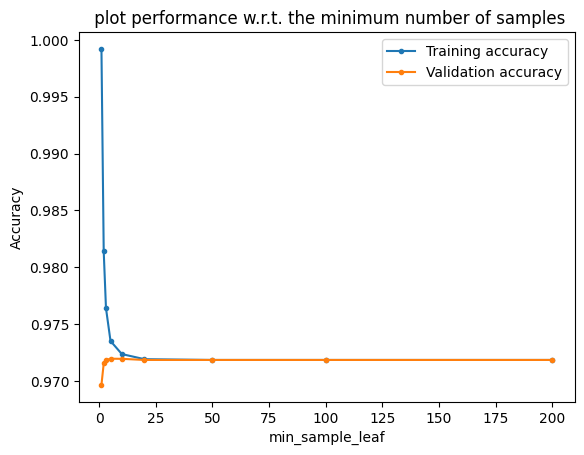

In [ ]:
# plot performance w.r.t. the minimum number of samples
plt.plot(leafs, train_acc_all, marker='.', label="Training accuracy")
plt.plot(leafs, val_acc_all, marker='.', label="Validation accuracy")
plt.xlabel('min_sample_leaf')
plt.ylabel('Accuracy')
plt.title(' plot performance w.r.t. the minimum number of samples')
plt.legend()

In [ ]:
#Initializes empty DataFrames named 'resultsTree' and 'results_rf' to store the results of model evaluation for the decision tree and random forest classifiers, respectively.
resultsTree = pd.DataFrame()
results_rf = pd.DataFrame()



In [ ]:

# Defines utility functions for model evaluation:

# evaulation: Displays the confusion matrix and prints recall and precision scores.
# auc_print: Prints the area under the ROC curve (AUC) score.

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score, precision_score, roc_auc_score
def evaulation(y, y_hat,):
    ConfusionMatrixDisplay(confusion_matrix(y, y_hat), display_labels=[False, True]).plot()
    plt.show()
    print(f'Recall: {recall_score(y, y_hat)}')
    print(f'Precision: {precision_score(y, y_hat)}')
def auc_print(y, y_hat_probs):
    print(f'AUC score: {roc_auc_score(y, y_hat_probs)}')

In [ ]:
# Defines a function called 'resultsDataFrame' to compute evaluation metrics and return them as a DataFrame.
# The function calculates AUC score, precision, and recall based on the predicted values ('y_hat') and predicted probabilities ('y_hat_prob') compared to the actual values ('y'), and stores them in a DataFrame with the given column name.
def resultsDataFrame(y, y_hat, y_hat_prob, column_name):
        return pd.DataFrame({f'{column_name}' : [round(roc_auc_score(y, y_hat_prob), 4), round(precision_score(y, y_hat), 4), round(recall_score(y, y_hat), 4)]}, index=['AUC', 'Precision', 'Recall'])

In [ ]:
# Creates GridSearchCV objects for hyperparameter tuning of decision tree and random forest classifiers:

# gridTree: Searches for the best combination of 'min_samples_leaf' and 'max_features' for the decision tree classifier using 3-fold cross-validation and ROC AUC scoring.
# gridforest: Searches for the best combination of 'min_samples_leaf' and 'n_estimators' for the random forest classifier using 3-fold cross-validation and ROC AUC scoring.

gridTree = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid={'min_samples_leaf' : [1,50,100], 'max_features':['sqrt','log2',1,300]}, cv=3, scoring='roc_auc')
gridforest = GridSearchCV(estimator=RandomForestClassifier(), param_grid={'min_samples_leaf' : [1,50,100], 'n_estimators' : [1,300]}, cv=3, scoring='roc_auc')


In [ ]:
#Fits the grid search object 'gridTree' to the training data ('X_train' and 'y_train') to find the best combination of hyperparameters.
#Then, prints the best parameters found by the grid search.
gridTree.fit(X_train, y_train)
print(gridTree.best_params_)

{'max_features': 300, 'min_samples_leaf': 100}


In [ ]:
# Fits the grid search object 'gridforest' to the training data ('X_train' and 'y_train') to find the best combination of hyperparameters.
# Then, prints the best parameters found by the grid search.
gridforest.fit(X_train, y_train)
print(gridforest.best_params_)

{'min_samples_leaf': 50, 'n_estimators': 300}


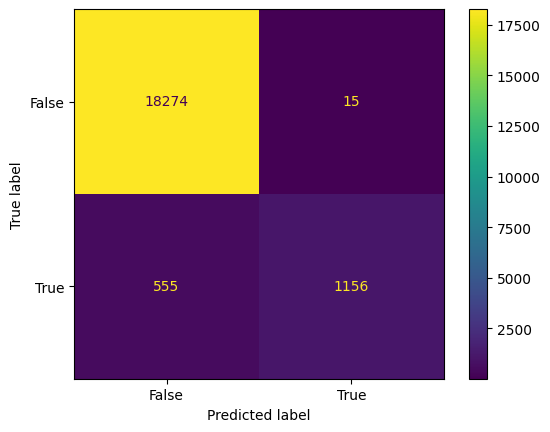

Recall: 0.6756282875511397
Precision: 0.9871904355251921
AUC score: 0.967120965392355


In [ ]:

#Trains a decision tree classifier with specified hyperparameters ('max_features' = 300 and 'min_samples_leaf' = 100) using the training data ('X_train' and 'y_train').
#Then, evaluates the trained model on the test set using the 'evaulation' function.
# prints the AUC score using the 'auc_print' function, and stores the evaluation metrics in the 'resultsTree' DataFrame using the 'resultsDataFrame' function with the column name 'Basic'.

model_tree1 = DecisionTreeClassifier(max_features=300, min_samples_leaf=100).fit(X_train, y_train)
evaulation(y_test, model_tree1.predict(X_test))
auc_print(y_test, model_tree1.predict_proba(X_test)[:,1])
resultsTree=pd.concat([resultsTree, resultsDataFrame(y_test,model_tree1.predict(X_test), model_tree1.predict_proba(X_test)[:,1], 'Basic')], axis=1)

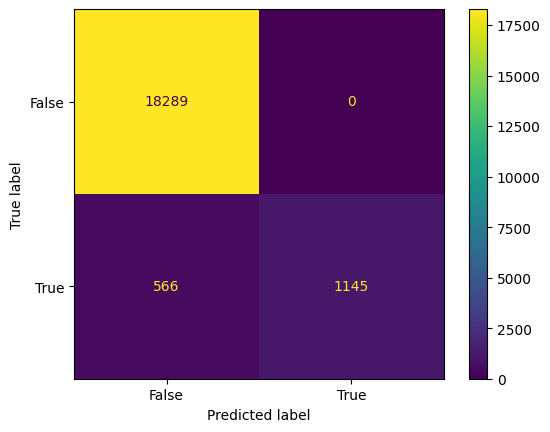

Recall: 0.6691992986557569
Precision: 1.0
AUC score: 0.9728040721861634


In [ ]:
#Trains a random forest classifier with specified hyperparameters ('min_samples_leaf' = 20 and 'n_estimators' = 300) using the training data ('X_train' and 'y_train').
#Then, evaluates the trained model on the test set using the 'evaulation' function.
# prints the AUC score using the 'auc_print' function, and stores the evaluation metrics in the 'results_rf' DataFrame using the 'resultsDataFrame' function with the column name 'Basic'.
model_randomforest = RandomForestClassifier(min_samples_leaf=20,n_estimators=300).fit(X_train, y_train)
evaulation(y_test, model_randomforest.predict(X_test))
auc_print(y_test, model_randomforest.predict_proba(X_test)[:,1])
results_rf=pd.concat([results_rf, resultsDataFrame(y_test,model_tree1.predict(X_test), model_tree1.predict_proba(X_test)[:,1], 'Basic')], axis=1)

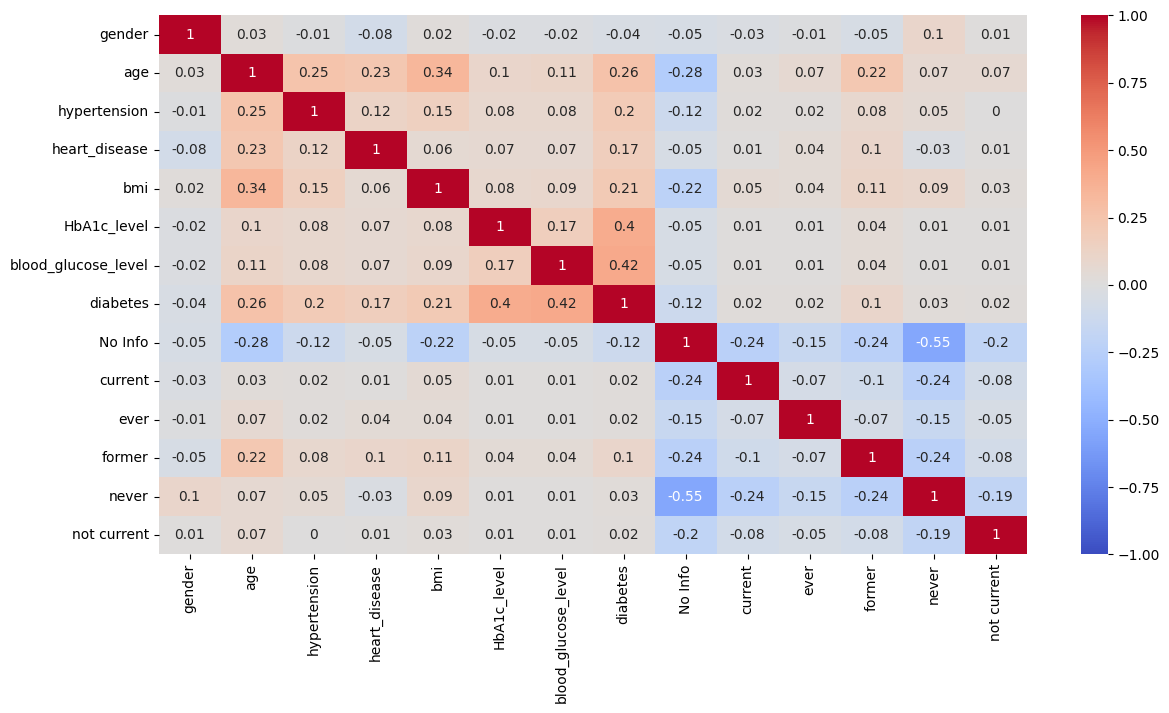

In [ ]:
#Selects numeric columns from the DataFrame 'filecsv', calculates the correlation matrix among these numeric columns, and creates a heatmap visualization of the correlations using seaborn.
numeric_cols = filecsv.select_dtypes(include='number')
fig, ax = plt.subplots(figsize=(14, 7))
corr = numeric_cols.corr().round(2)
sns.heatmap(corr, annot=True, ax=ax, vmin=-1, vmax=1, center=0, cmap='coolwarm')
plt.show()

In [ ]:
filecsv['gender'].replace(['Other', 'Male','Female'],[0,1,2], inplace=True)

In [ ]:
# Instantiates an AdaBoost classifier using a random forest classifier ('model_randomforest') as the base estimator.
from sklearn.ensemble import AdaBoostClassifier

# Instantiate AdaBoostClassifier
#classifier = AdaBoostClassifier()

# from sklearn.ensemble import AdaBoostClassifier

classifier = AdaBoostClassifier(estimator=model_randomforest)

In [ ]:
Fits the AdaBoost classifier to the training data ('X_train' and 'y_train')
classifier.fit(X_train, y_train)

AdaBoostClassifier(estimator=RandomForestClassifier(min_samples_leaf=20,
                                                    n_estimators=300))

In [ ]:
#Imports the AdaBoost classifier and accuracy_score from sklearn. Then, prints the training and testing accuracies of the AdaBoost classifier on the respective datasets.
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
#classifier.fit(X_train, y_train)
print('Training accuracy {:.4f}'.format(classifier.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(classifier.score(X_test,y_test)))

Training accuracy 0.9992
Testing accuracy 0.9664


In [106]:
# This code snippet prompts the user to input various health-related information about a person, including gender, age, medical history, BMI, and smoking habits.
# Then, it predicts whether the person is diabetic or not using the trained AdaBoost classifier.
# 00Finally, it prints the prediction result as well as an interpretation based on the prediction.

gender = int(input("Enter The gender write 1 for female and 0 for male"))
age = int(input("Enter Age"))
hypertension = int(input("If Patient has hypertension then write 1 if not then 0"))
heart_disease = int(input("If Patient has heart disease write 1 if not 0"))
bmi = float(input("Enter BMI of the patient"))
HbA1c_lvl = float(input("Enter HbA1c Level of the patient"))
blood_glucose = int(input("Enter blood glucose level of the patient"))
sh_noinfo = int(input("Enter 1 if you have no information regarding their smoking habit or write 0 "))
sh_current = int(input("Enter 1 if you know patient is currently smoking  or write 0 "))
sh_ever = int(input("Enter 1 if you know whether patient has ever took up smoking or write 0 "))
sh_former = int(input("Enter 1 if you know whether patient was a former smoker or write 0 "))
sh_never = int(input("Enter 1 if you know that patient never smoke or write 0 "))
sh_notcurrent = int(input("Enter 1 if you know that patient is not currently smoking but have done it on occasion or write 0 "))
input_data = (gender,age,hypertension,heart_disease,bmi,HbA1c_lvl,blood_glucose,sh_noinfo,sh_current,sh_ever,sh_former,sh_never,sh_notcurrent)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')



Enter The gender write 1 for female and 0 for male1
Enter Age80
If Patient has hypertension then write 1 if not then 00
If Patient has heart disease write 1 if not 01
Enter BMI of the patient25.19
Enter HbA1c Level of the patient6.6
Enter blood glucose level of the patient140
Enter 1 if you have no information regarding their smoking habit or write 0 0
Enter 1 if you know patient is currently smoking  or write 0 0
Enter 1 if you know whether patient has ever took up smoking or write 0 0
Enter 1 if you know whether patient was a former smoker or write 0 0
Enter 1 if you know that patient never smoke or write 0 1
Enter 1 if you know that patient is not currently smoking but have done it on occasion or write 0 0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[0]
The person is not diabetic
